In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import tensorflow as tf
from keras.optimizers import RMSprop
from keras.preprocessing.image import ImageDataGenerator
import cv2
from keras.models import Sequential
from keras.layers import Conv2D, Input, ZeroPadding2D, BatchNormalization, Activation, MaxPooling2D, Flatten, Dense,Dropout
from keras.models import Model, load_model
from keras.callbacks import TensorBoard, ModelCheckpoint
from sklearn.model_selection import train_test_split
from sklearn.metrics import f1_score
from sklearn.utils import shuffle
import imutils
import numpy as np

In [12]:
config = tf.compat.v1.ConfigProto( device_count = {'GPU': 1 , 'CPU': 56} ) #max: 1 gpu, 56 cpu
sess = tf.compat.v1.Session(config=config) 
tf.compat.v1.keras.backend.set_session(sess)

In [13]:
model =Sequential([
                   
    Conv2D(100, (3,3), activation='relu', input_shape=(150, 150, 3)),
    MaxPooling2D(2,2),
    
    Conv2D(100, (3,3), activation='relu'),
    MaxPooling2D(2,2),
    
    Flatten(),
    Dropout(0.5),
    Dense(50, activation='relu'),
    Dense(2, activation='softmax')
])
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['acc'])

In [14]:
TRAINING_DIR = "/content/drive/My Drive/Colab Notebooks/Mask Detection/Images/train/train"
train_datagen = ImageDataGenerator(rescale=1.0/255,
                                   rotation_range=40,
                                   width_shift_range=0.2,
                                   height_shift_range=0.2,
                                   shear_range=0.2,
                                   zoom_range=0.2,
                                   horizontal_flip=True,
                                   fill_mode='nearest')

train_generator = train_datagen.flow_from_directory(TRAINING_DIR, 
                                                    batch_size=10, 
                                                    target_size=(150, 150))
VALIDATION_DIR = "/content/drive/My Drive/Colab Notebooks/Mask Detection/Images/test/test"
validation_datagen = ImageDataGenerator(rescale=1.0/255)

validation_generator = validation_datagen.flow_from_directory(VALIDATION_DIR, 
                                                         batch_size=10, 
                                                         target_size=(150, 150))

Found 1315 images belonging to 2 classes.
Found 194 images belonging to 2 classes.


In [15]:
checkpoint = ModelCheckpoint('model2-{epoch:03d}.model',monitor='val_loss',verbose=0,save_best_only=True,mode='auto')


history = model.fit_generator(train_generator,
                              epochs=20,
                              validation_data=validation_generator,
                              callbacks=[checkpoint])

/usr/local/lib/python3.7/dist-packages/keras/engine/training.py:1915: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Epoch 1/20
132/132 [==============================] - 254s 2s/step - loss: 0.6961 - acc: 0.6209 - val_loss: 0.2558 - val_acc: 0.9278
INFO:tensorflow:Assets written to: model2-001.model/assets
Epoch 2/20
132/132 [==============================] - 20s 153ms/step - loss: 0.4570 - acc: 0.8191 - val_loss: 0.1942 - val_acc: 0.9485
INFO:tensorflow:Assets written to: model2-002.model/assets
Epoch 3/20
132/132 [==============================] - 20s 154ms/step - loss: 0.3609 - acc: 0.8537 - val_loss: 0.1968 - val_acc: 0.9742
Epoch 4/20
132/132 [==============================] - 20s 153ms/step - loss: 0.2608 - acc: 0.9138 - val_loss: 0.1122 - val_acc: 0.9588
INFO:tensorflow:Assets written to: model2-004.model/assets
Epoch 5/20
132/132 [==============================] - 20s 152ms/step - loss: 0.2235 - acc: 0.9115 - val_loss: 0.1813 - val_acc: 0.9330
Epoch 6/20
132/132 [==============================] - 20s 152ms/step - loss: 0.2373 - acc: 0.9107 - val_loss: 0.1662 - val_acc: 0.9278
Epoch 7/20
132/

In [17]:
model.save('/content/drive/My Drive/Colab Notebooks/Mask Detection/model-20.h5')

In [19]:

test_scores = model.evaluate(validation_generator)

20/20 [==============================] - 1s 55ms/step - loss: 0.1157 - acc: 0.9381


In [20]:

print('Testing Accuracy: %.3f' % test_scores[1])
print('Testing Loss: %.3f' % test_scores[0])

Testing Accuracy: 0.938
Testing Loss: 0.116


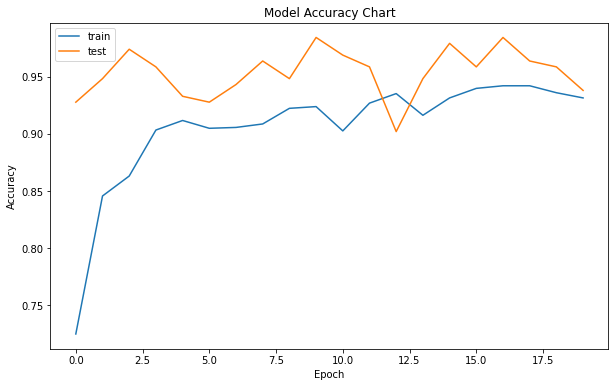

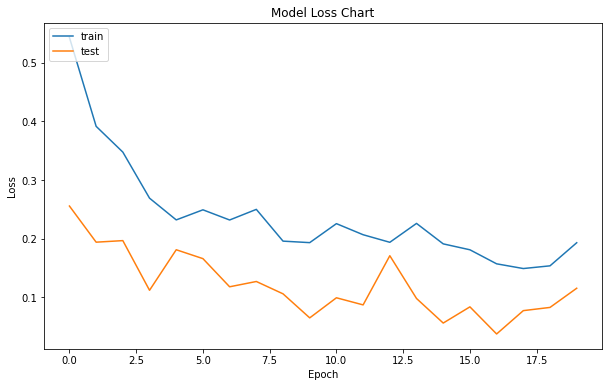

In [23]:
import matplotlib.pyplot as plt
# summarize history for accuracy
fig = plt.figure(figsize=(10, 6))
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('Model Accuracy Chart')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

# summarize history for loss
fig = plt.figure(figsize=(10, 6))
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss Chart')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [24]:
y_pred = model.predict_classes(validation_generator)
y_pred

/usr/local/lib/python3.7/dist-packages/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


array([0, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0,
       0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1,
       0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0,
       1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 0,
       0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0,
       1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 1,
       0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0,
       1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0])